In [2]:
import scanpy as sc
import pandas as pd 
import numpy as np 
adata_discovery = sc.read_h5ad("/scratch/user/s4735100/Discovery_cohort.h5ad")
adata_discovery

/home/s4735100/mambaforge/lib/python3.10/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 187361 × 33538
    obs: 'sanger_sample_id', 'disease_status', 'biopsy_type', 'age', 'sex', 'inflammation_status', 'smoking_status', 'bead_version', 'bead_lot', 'chip_version', 'chip_lot', 'lane', 'enzyme_lot_blp', 'gem_lot', 'f1_f2_ratio', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'n_genes_by_counts', 'normalization_factor', 'pct_counts_gene_group__mito_transcript', 'cell_passes_qc', 'scrublet__multiplet_scores', 'scrublet__predicted_multiplet', 'predicted_celltype_probability', 'major_cell_type', 'predicted_celltype', 'label__machine', 'category__machine', 'medication_class', 'disease_status__machine'
    var: 'gene_symbols', 'feature_types', 'gene_group__mito_transcript', 'gene_group__mito_protein', 'gene_group__ribo_protein', 'gene_group__ribo_rna', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'cell_filtered_per_experiment'
    layers: 'counts', 'log1p_cp10k

In [3]:
adata_replication=sc.read_h5ad("/scratch/user/s4735100/Replication_cohort.h5ad")

/home/s4735100/mambaforge/lib/python3.10/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [4]:
samples_to_keep = ["Crohns_Disease_Collection_Study8727487","5892STDY8357647","5892STDY8357454","OTARscRNA9294504", "5892STDY8039745", "5892STDY8039649", "5892STDY8039841", "5892STDY8357359"]
adata = adata_discovery[adata_discovery.obs["sanger_sample_id"].isin(samples_to_keep)]

In [5]:
adata.obs['sanger_sample_id']. unique()

['5892STDY8039649', '5892STDY8039745', '5892STDY8039841', '5892STDY8357359', '5892STDY8357454', '5892STDY8357647', 'Crohns_Disease_Collection_Study8727487', 'OTARscRNA9294504']
Categories (8, object): ['5892STDY8039649', '5892STDY8039745', '5892STDY8039841', '5892STDY8357359', '5892STDY8357454', '5892STDY8357647', 'Crohns_Disease_Collection_Study8727487', 'OTARscRNA9294504']

In [6]:
extra_scoring_file = '/scratch/user/s4735100/extra_scoring.h5ad'
adata.write(extra_scoring_file)

In [7]:
sc.tl.pca(adata)
sc.pp.neighbors(adata, n_pcs=30, n_neighbors=20)
sc.tl.umap(adata, min_dist=0.3)

/home/s4735100/mambaforge/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/s4735100/mambaforge/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/s4735100/mambaforge/lib/python3.10/site-packages/umap/distances.py:1086: NumbaDepr

In [8]:
sc.tl.leiden(adata)

/home/s4735100/mambaforge/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/s4735100/mambaforge/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/s4735100/mambaforge/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


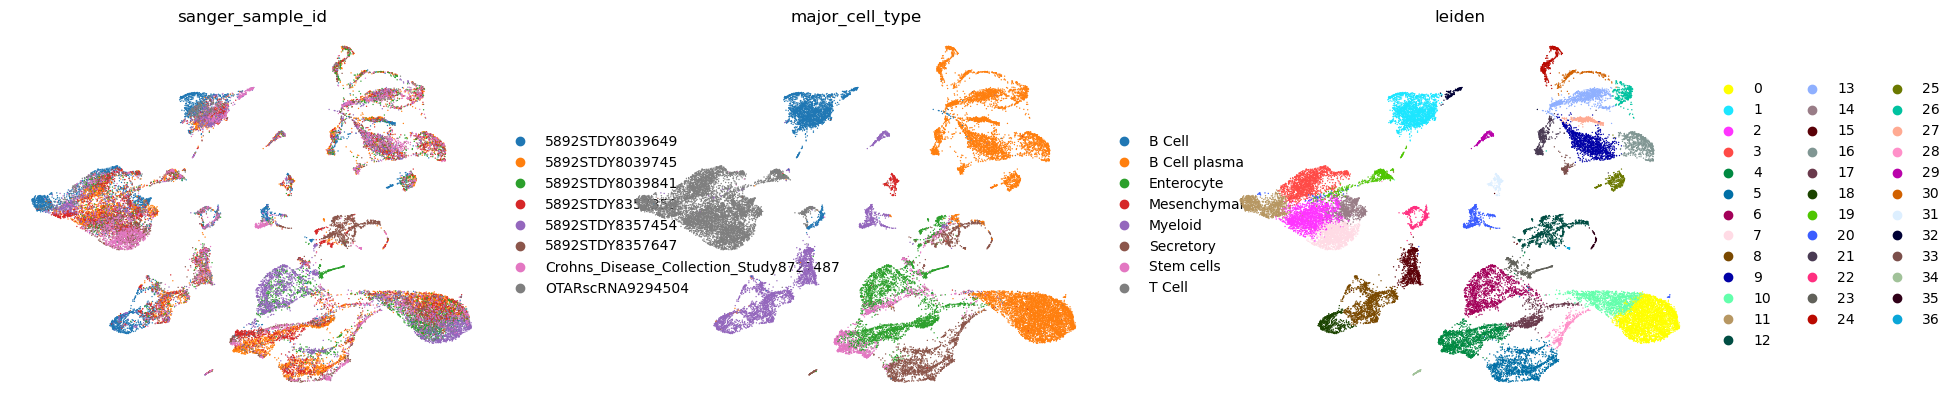

In [9]:
sc.pl.umap(
    adata,
    color=["sanger_sample_id", 'major_cell_type', 'leiden'],
    frameon=False,
)

In [10]:
sc.external.pp.harmony_integrate(adata, key="sanger_sample_id", basis='X_pca', adjusted_basis='X_pca_harmony', )

2024-04-22 20:01:35,459 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...


2024-04-22 20:01:52,748 - harmonypy - INFO - sklearn.KMeans initialization complete.
2024-04-22 20:01:52,860 - harmonypy - INFO - Iteration 1 of 10
2024-04-22 20:02:08,557 - harmonypy - INFO - Iteration 2 of 10
2024-04-22 20:02:23,202 - harmonypy - INFO - Iteration 3 of 10
2024-04-22 20:02:38,387 - harmonypy - INFO - Iteration 4 of 10
2024-04-22 20:02:54,436 - harmonypy - INFO - Iteration 5 of 10
2024-04-22 20:03:08,467 - harmonypy - INFO - Iteration 6 of 10
2024-04-22 20:03:27,785 - harmonypy - INFO - Iteration 7 of 10
2024-04-22 20:03:46,824 - harmonypy - INFO - Iteration 8 of 10
2024-04-22 20:04:04,915 - harmonypy - INFO - Iteration 9 of 10
2024-04-22 20:04:10,978 - harmonypy - INFO - Iteration 10 of 10
2024-04-22 20:04:20,458 - harmonypy - INFO - Converged after 10 iterations


In [11]:
sc.pp.neighbors(adata, use_rep="X_pca_harmony")
sc.tl.umap(adata, min_dist=0.3)
sc.tl.leiden(adata, key_added = "harmony_leiden")

/home/s4735100/mambaforge/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/s4735100/mambaforge/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/s4735100/mambaforge/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


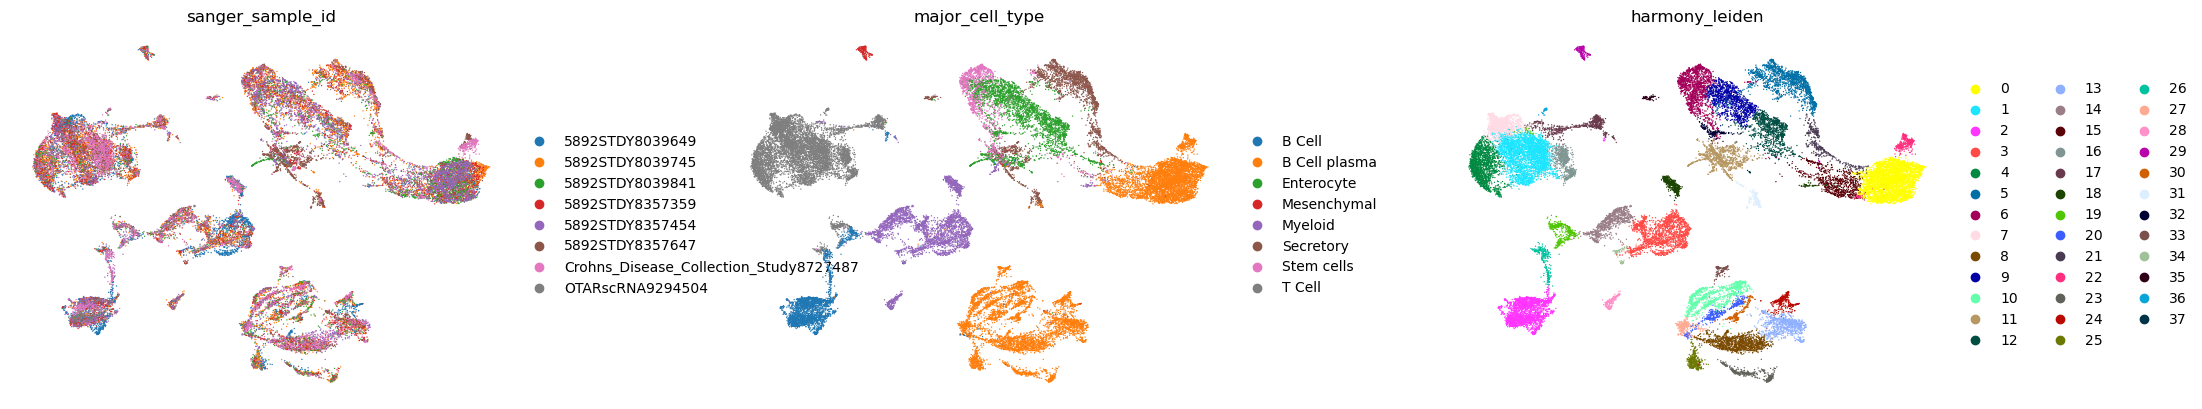

In [12]:
sc.pl.umap(
    adata,
    color=["sanger_sample_id", 'major_cell_type', 'harmony_leiden'],
    wspace=0.3,
    frameon=False,
)

In [13]:
gene_dictionary = [
    "CD4", "CD8A", "CTSW", "CD58","ITGAE", "CD3E", "CD8B", "TRAC", "TRGC2",
    "NKG7", "CCL5", "CD7", "SELL", "CD44", "CCR7", "KLRG1", "PDCD1",
    "CD69", "TBX21", "RUNX3", "RORC", "GATA3", "FOXP3", "ID2", "TCF7", "CD28", 
    "TNFRSF4", "CD244", "IL2RB", "IL2RB", "IL2RA", "IL7R", "CTLA4", "GZMB", 
    "ITGB7", "IFNG", "IL4", "IL10", "IL17A", "EPCAM"
]

In [14]:
my_gene_dictionary = {
    "Macrophages": [
        "TLR4", "TNF", "IL6", "IL1B", "IL10", "CXCL8", "CXCL10", "CD163"],
    "Dendritic Cells": ["CD86", "HLA-DRA", "IL12B", "IL23A", "CD40", "CD80", "CD83"],
    "Natural Killer Cells": [
        "CD69", "IFNG", "IL15", "IL18", "PRF1", "GZMB", "KIR2DL1", "KIR3DL1"],
    "T Cells": [
        "CD3D", "CD3E", "CD3G", "CD4", "CD8A", "CD28", "CD40LG", "FOXP3"],
    "B Cells": [
        "MS4A1","CD19", "CD79A", "CD79B", "IGHM" ],
    "Plasma Cell": ["CD24", "CD27","CD38", "CXCR4", "TNFRSF17", "IRF4", "PRDM1", "SDC1", "XBP1", "IGHA1", "IGHG1"],
    "Cytokines": [
        "IL1A", "IL7", "IL12A", "IL13", "IL21", "TGFB1", "CSF2"],
    "Epithelial cell": ["EPCAM", "KRT8", "KRT18", "KRT19", "CDH1", "OCLN", "CLDN1", "CLDN3", "CLDN4"],
    "Tight junction proteins": [
        "TJP1", "TJP2", "TJP3"],
     "Mucins": [
        "MUC1", "MUC2", "MUC4", "MUC5AC", "MUC5B"],
    "Intestinal stem cell": ["LGR5", "TERT"]
}

In [15]:
adata.var

,gene_symbols,feature_types,gene_group__mito_transcript,gene_group__mito_protein,gene_group__ribo_protein,gene_group__ribo_rna,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts
ENSG00000243485,MIR1302-2HG,Gene Expression,False,False,False,False,8,0.000011,0.000011,99.998900,8.0,2.197225
ENSG00000237613,FAM138A,Gene Expression,False,False,False,False,2,0.000003,0.000003,99.999725,2.0,1.098612
ENSG00000186092,OR4F5,Gene Expression,False,False,False,False,1,0.000001,0.000001,99.999862,1.0,0.693147
ENSG00000238009,AL627309.1,Gene Expression,False,False,False,False,1880,0.002629,0.002626,99.741472,1912.0,7.556428
ENSG00000239945,AL627309.3,Gene Expression,False,False,False,False,252,0.000347,0.000346,99.965346,252.0,5.533390
...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000277856,AC233755.2,Gene Expression,False,False,False,False,1870,0.030366,0.029914,99.742847,22082.0,10.002563
ENSG00000275063,AC233755.1,Gene Expression,False,False,False,False,2401,0.016410,0.016276,99.669827,11933.0,9.387147
ENSG00000271254,AC240274.1,Gene Expression,False,False,False,False,29682,0.050956,0.049700,95.918283,37055.0,10.520185
ENSG00000277475,AC213203.1,Gene Expression,False,False,False,False,1,0.000001,0.000001,99.999862,1.0,0.693147


In [16]:
adata.var.set_index("gene_symbols", inplace=True, drop=False)